In [149]:
import pandas as pd
import numpy as np

In [150]:
def euclidean(x1,y1,x,y):
    return ((x1-x)**2 + (y1-y)**2)**(1/2)

In [151]:
def manhattan(x1,y1,x,y):
    return abs(x1-x) + abs(y1-y)     

In [152]:
def minkowski(x1,y1,x,y,p=5):
    return ((abs(x1-x))**p + 2*(abs(y1-y))**p)**(1/p)

In [153]:
data = pd.read_csv("../datasets/knn.csv")    

In [154]:
c1x,c1y,c2x,c2y = 7,7,3,4 
data["Euclidian"] = [0]*len(data)
data["Manhattan"] = [0]*len(data)
data["Minkowski"] = [0]*len(data)


#Using Eucildean
clusters = []
flag = False
while(flag == False):
    for i in range(len(data)):
        data.iloc[i:i+1,3] = euclidean(data.iloc[i:i+1,0:1],data.iloc[i:i+1,0:1],c2x,c2y)
        data.iloc[i:i+1,4] = manhattan(data.iloc[i:i+1,0:1],data.iloc[i:i+1,0:1],c2x,c2y)
        data.iloc[i:i+1,5] = minkowski(data.iloc[i:i+1,0:1],data.iloc[i:i+1,0:1],c2x,c2y)

    break
mk,mh,eu = data.sort_values(['Minkowski']), data.sort_values(['Manhattan']), data.sort_values(['Euclidian'])



In [176]:
for k in range(2,5):
    good, bad = 0,0
    for i in range(k):
        for i in mh['y'][:k]:
            if i=='Good':
                good += 1
            else:
                bad += 1
    if good>bad:
        what = "good"
    else:
        what = "bad"
    print(f"Classification: {what}\tK={k}")

Classification: bad	K=2
Classification: good	K=3
Classification: bad	K=4


In [177]:
for k in range(3):
    good, bad = 0,0
    for i in range(k):
        for i in mk['y'][:k]:
            if i=='Good':
                good += 1
            else:
                bad += 1
    if good>bad:
        what = "good"
    else:
        what = "bad"
    print(f"Classification: {what}\tK={k}")

Classification: bad	K=0
Classification: bad	K=1
Classification: bad	K=2


In [180]:
for k in range(3):
    good, bad = 0,0
    for i in range(k):
        for i in eu['y'][:k]:
            if i=='Good':
                good += 1
            else:
                bad += 1
    print(good, bad)
    if good>bad:
        what = "good"
    else:
        what = "bad"
    print(f"Classification: {what}\tK={k}")

0 0
Classification: bad	K=0
1 0
Classification: good	K=1
2 2
Classification: bad	K=2


In [160]:
from sklearn.neighbors import KNeighborsClassifier

In [161]:
skdata = pd.read_csv("../datasets/knn.csv")
X = skdata.iloc[:,:2]
y = skdata.iloc[:,2:]
y = np.array(y)

In [162]:
def convert(x):
    if x=='Good':
        return 1
    return 0
y = list(map(convert,y))
skdata["Classification"] = y


In [163]:

#Using Minkowski
mink = KNeighborsClassifier(n_neighbors=3,p=3, metric='minkowski')
mink.fit(X,y)

print("Good" if neigh.predict([[3,7]]) else "Bad")

Good


/home/AIML_Student/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [164]:
#Using Eucildean
eucli = KNeighborsClassifier(n_neighbors=3,p=2, metric='euclidean')
eucli.fit(X,y)

print("Good" if neigh.predict([[3,7]]) else "Bad")

Good


/home/AIML_Student/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [165]:
#Using Manhattan Distance
nyc = KNeighborsClassifier(n_neighbors=3,p=1, metric='manhattan')
nyc.fit(X,y)

print("Good" if neigh.predict([[3,7]]) else "Bad")

Good


/home/AIML_Student/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


/home/AIML_Student/.local/lib/python3.10/site-packages/sklearn/inspection/_plot/decision_boundary.py:186: UserWarning: The following kwargs were not used by contour: 'shading'
  self.surface_ = plot_func(self.xx0, self.xx1, self.response, **kwargs)
/home/AIML_Student/.local/lib/python3.10/site-packages/sklearn/inspection/_plot/decision_boundary.py:186: UserWarning: The following kwargs were not used by contour: 'shading'
  self.surface_ = plot_func(self.xx0, self.xx1, self.response, **kwargs)
/home/AIML_Student/.local/lib/python3.10/site-packages/sklearn/inspection/_plot/decision_boundary.py:186: UserWarning: The following kwargs were not used by contour: 'shading'
  self.surface_ = plot_func(self.xx0, self.xx1, self.response, **kwargs)


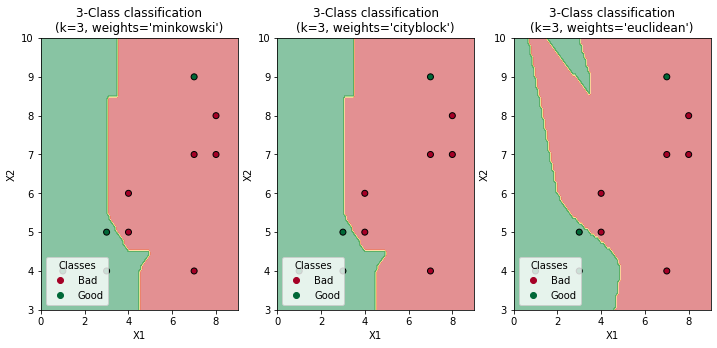

In [175]:
import matplotlib.pyplot as plt

from sklearn.inspection import DecisionBoundaryDisplay
_, axs = plt.subplots(ncols=3, figsize=(12, 5))
clf = KNeighborsClassifier(n_neighbors=3, p=1)
for ax, weights in zip(axs, ("minkowski", "cityblock","euclidean")):
    clf.set_params(metric=weights)
    clf.fit(X,y)
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        cmap=plt.cm.RdYlGn,
        xlabel="X1",
        ylabel="X2",
        shading="auto",
        alpha=0.5,
        ax=ax,
    )
    scatter = disp.ax_.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors="k",cmap=plt.cm.RdYlGn)
    disp.ax_.legend(
        scatter.legend_elements()[0],
        ["Bad","Good"],
        loc="lower left",
        title="Classes",
        
    )
    _ = disp.ax_.set_title(
        f"3-Class classification\n(k={clf.n_neighbors}, weights={weights!r})"
    )
plt.show()
